In [ ]:
# Web scrapping
# EDA
# Text Preprocessing
# Sentiment Analysis
# machine learning
# clustering algorithms
# topic modelling
# NER
# BERT

In [13]:
## Practical 1: Web Scrapping


import requests
from bs4 import BeautifulSoup

url = "https://www.scobserver.in/cases/jarnail-singh-v-lacchmi-narain-gupta-reservation-in-promotion-case-background/"
soup = BeautifulSoup(requests.get(url).text, 'html.parser')

title = soup.select_one('div.single-cases__header').get_text(strip=True, separator='\n')
key_issues = soup.select_one('div.single-cases__key-issues').get_text(strip=True, separator='\n')
desc = soup.select_one('div.single__body.single-cases__body').get_text(strip=True, separator='\n')
parties = soup.select_one('div.single-cases__col-2').get_text(strip=True, separator='\n')
judges = soup.select_one('div.single-cases__col-1').get_text(strip=True, separator='\n')

case_number = None
for p in soup.select_one('div.single-cases__col-3').find_all('p'):
    if "Case Number:" in p.text:
        case_number = p.text.replace("Case Number:", "").strip()
        break

print("Case Number:", case_number)
print("\nParties:", parties)
print("\nJudges:", judges)
print("\nKey Issues:", key_issues)
print("\nDescription:", desc)


Case Number: SLP (C) 30621/2011 [Diary No. 34614/2011]

Parties: Parties
Petitioner:
Jarnail Singh
Lawyers:
Mr. P.S. Patwalia
Respondent :
Lacchmi Narain Gupta
Lawyers:
Mr. Rajeev Dhavan

Judges: L.N. Rao J
Sanjiv Khanna CJI
B.R. Gavai J

Key Issues: Key Issues
1
Whether Nagaraj, which upheld reservation in promotions for SC/STs, was correctly decided?
2
Whether Nagaraj violates the Indra Sawhney judgement by requiring SC/STs to be proved as backward afresh in questions of reservation in promotion?

Description: Case Description
In 2006, the Court delivered its judgment in
M. Nagaraj v. Union of India
.
In it, the Court validated Parliament’s decision to extend reservations for SC/STs to include promotions (reservation in promotion). However, the Court also laid down conditions which made it difficult for the Central and State Governments to grant such reservations.
Specifically, the
Nagaraj
judgement laid down three controlling conditions that the State must meet prior to granting a S

Shape of dataset: (40160, 14)

Data Types:
 Report Number          int64
Date Reported         object
Date of Occurrence    object
Time of Occurrence    object
City                  object
Crime Code             int64
Crime Description     object
Victim Age             int64
Victim Gender         object
Weapon Used           object
Crime Domain          object
Police Deployed        int64
Case Closed           object
Date Case Closed      object
dtype: object

Missing values:
 Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

Summary Statistics:
        Report Number    Crime Code   Victim Age  Police Deployed
count   40160.000000  4016

C:\Users\Purav Badani\AppData\Local\Temp\ipykernel_29796\390163815.py:36: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')


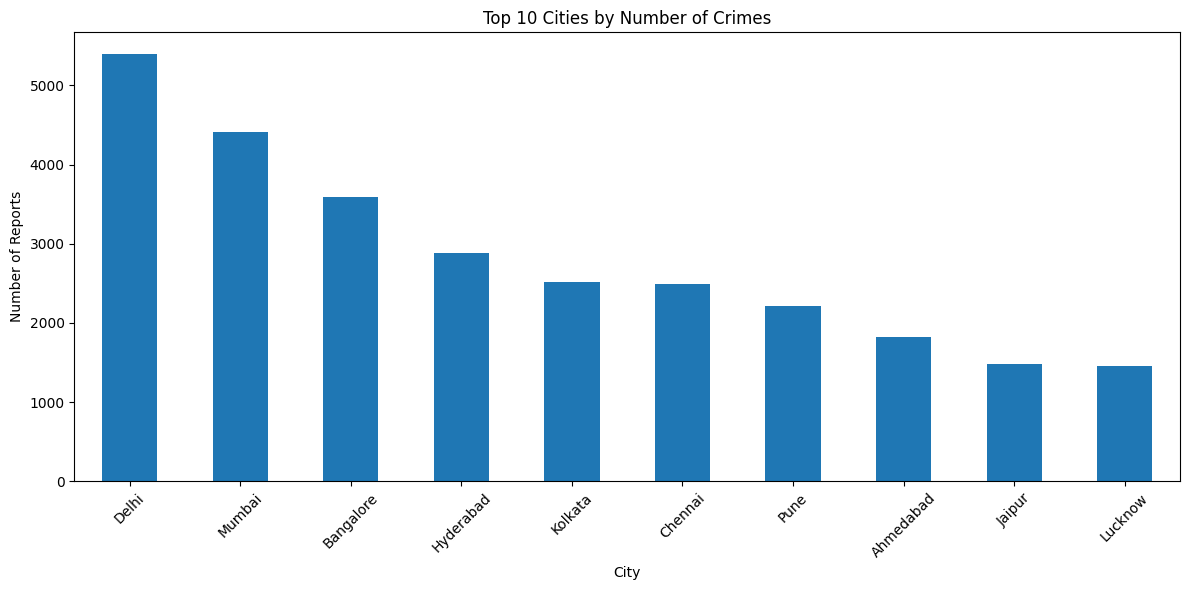

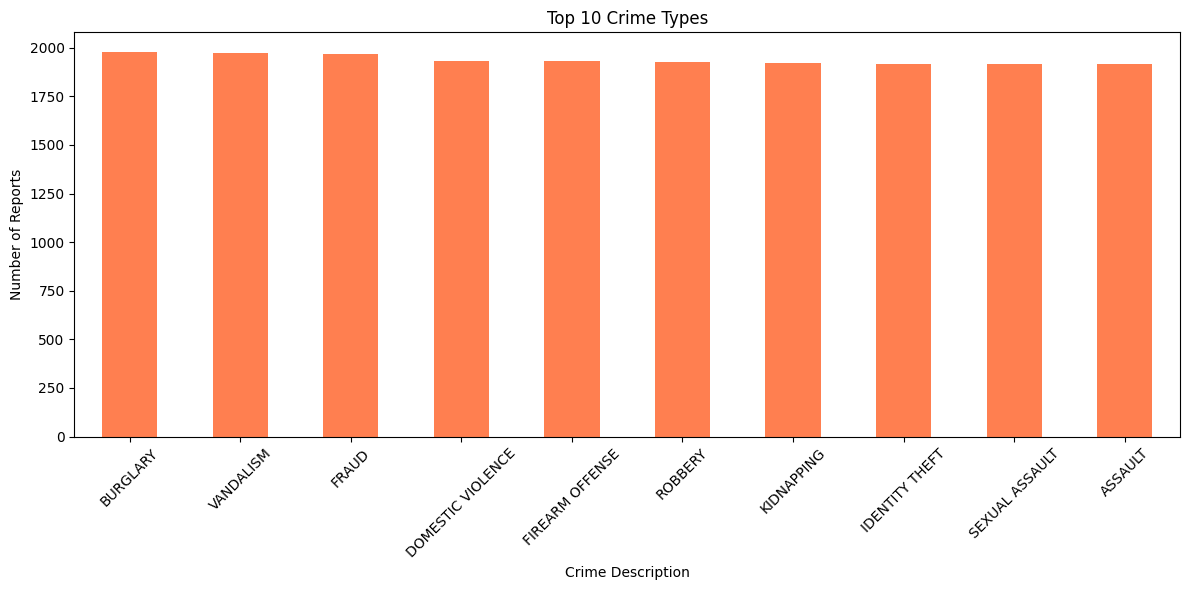

C:\Users\Purav Badani\AppData\Local\Temp\ipykernel_29796\390163815.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Victim Gender', palette='Set2')


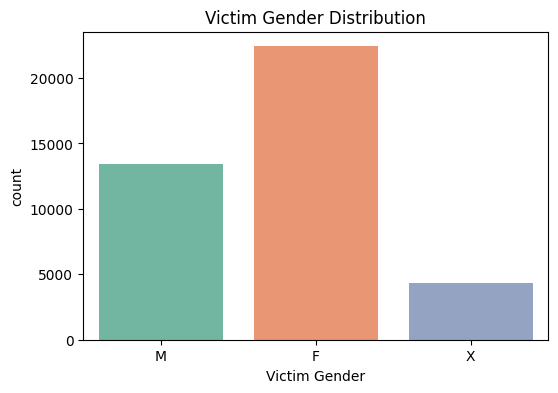

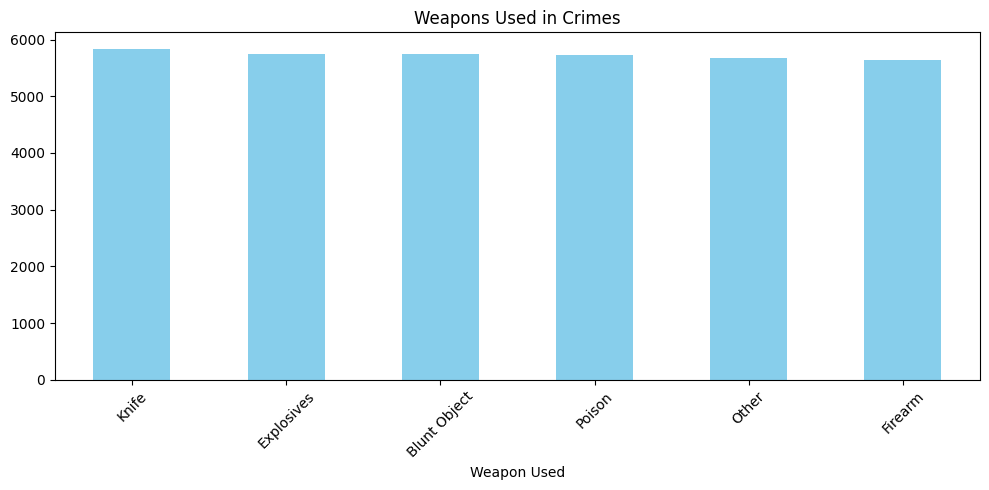

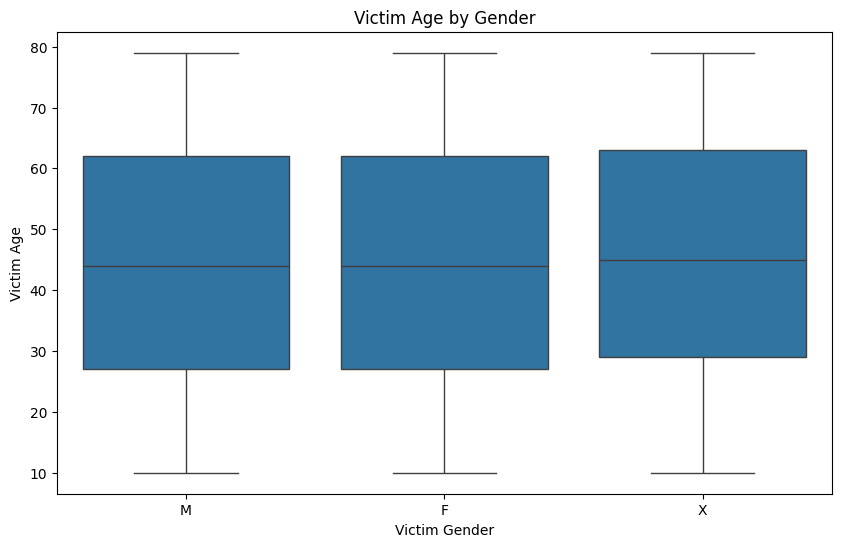

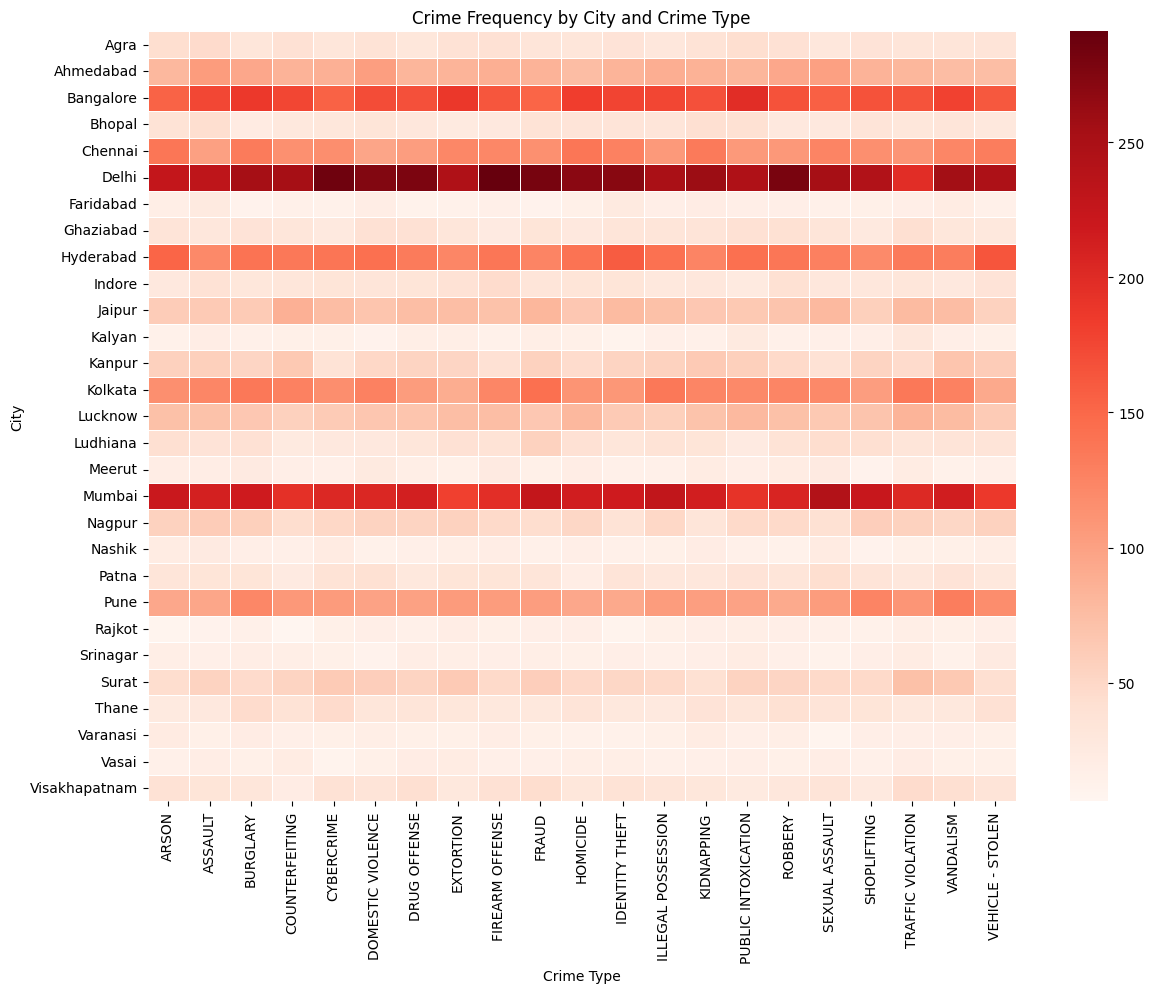

In [1]:
# Practical 2 Exploratory Data Analysis

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
path = r"C:\Users\Purav Badani\Desktop\DataScience\Sem 4\LegalAnalytics\Practicals\crime_dataset_india.csv" 
df = pd.read_csv(path) 
df.head() 

# 1. Shape of DataSet 
# ============================= 
print("Shape of dataset:", df.shape) 
 
# 2. Data Types 
print("\nData Types:\n", df.dtypes)

#3. Missing Values 
print("\nMissing values:\n", df.isnull().sum()) 

# 4. Summary Statistics 
print("\nSummary Statistics:\n", df.describe()) 

# Calculate mean, median, and mode for numerical columns 
mean_values = df.mean(numeric_only=True) 
print ("\n Mean Values:\n", mean_values) 
print ("--------------------------------") 
median_values = df.median(numeric_only=True) 
print ("\n Mean Values:\n", median_values) 
print ("--------------------------------") 
mode_values = df.mode(numeric_only=True).iloc[0] 
print ("\n Mode Values:\n", mode_values) 

#Convert date columns to datetime 
df['Date Reported'] = pd.to_datetime(df['Date Reported'], errors='coerce') 
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce') 
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')

#Top 10 cities by number of crimes 
plt.figure(figsize=(12, 6)) 
df['City'].value_counts().head(10).plot(kind='bar') 
plt.title("Top 10 Cities by Number of Crimes") 
plt.ylabel("Number of Reports") 
plt.xlabel("City") 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show() 

# Most common crime types 
plt.figure(figsize=(12, 6)) 
df['Crime Description'].value_counts().head(10).plot(kind='bar', color='coral') 
plt.title("Top 10 Crime Types") 
plt.ylabel("Number of Reports") 
plt.xlabel("Crime Description") 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show() 

# Victim Gender distribution 
plt.figure(figsize=(6, 4)) 
sns.countplot(data=df, x='Victim Gender', palette='Set2') 
plt.title("Victim Gender Distribution") 
plt.show() 

#Weapon used 
plt.figure(figsize=(10, 5)) 
df['Weapon Used'].value_counts().plot(kind='bar', color='skyblue') 
plt.title("Weapons Used in Crimes") 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

# Victim Age distribution by Gender 
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df, x='Victim Gender', y='Victim Age') 
plt.title("Victim Age by Gender") 
plt.show()


#Crime Heatmap by City and Crime Type 
city_crime_pivot = df.pivot_table(index='City', columns='Crime Description', aggfunc='size', fill_value=0) 
plt.figure(figsize=(14, 10)) 
sns.heatmap(city_crime_pivot, cmap='Reds', linewidths=0.5) 
plt.title("Crime Frequency by City and Crime Type") 
plt.xlabel("Crime Type") 
plt.ylabel("City") 
plt.show()

In [49]:
#Practical 3: Text Preprocessing

import nltk
import string
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer

# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Sample legal text
text = """Legal texts encompass a #variety of documents related to law,
including statutes, case law, legal treatises, and agreements.
They are characterized by their precision, clarity, and formality,
aiming to establish and enforce rules and obligations."""

# Step 1: Sentence Tokenization
print("\n--- Sentence Tokenization ---")
for i, sent in enumerate(sent_tokenize(text), 1):
    print(f"Sentence {i}: {sent}")

# Step 2: Word Tokenization
print("\n--- Word Tokenization ---")
words = word_tokenize(text)
print("Words:", words)

# Step 3: Remove Stopwords and Punctuation
stop_words = set(stopwords.words('english'))

filtered_words = [
    word for word in words
    if word.lower() not in stop_words and word not in string.punctuation
]
print("\n--- After Removing Stopwords and Punctuation ---")
print("Filtered Words:", filtered_words)

# Remove special characters inside words
cleaned_words = [
    re.sub(r'[^a-zA-Z]', '', word) for word in filtered_words
]

# Remove empty strings that resulted from cleaning
cleaned_words = [word for word in cleaned_words if word]
print("\n--- After Removing Special Characters ---")
print("Cleaned Words:", cleaned_words)

# Step 4: Stemming
print("\n--- Stemming Results ---")
ps = PorterStemmer()
snowball = SnowballStemmer("english")
lancaster = LancasterStemmer()

print("\nPorter Stemmer:")
print([ps.stem(word) for word in cleaned_words])

print("\nSnowball Stemmer:")
print([snowball.stem(word) for word in cleaned_words])

print("\nLancaster Stemmer:")
print([lancaster.stem(word) for word in cleaned_words])

# Step 5: Lemmatization
print("\n--- Lemmatization ---")
lemmatizer = WordNetLemmatizer()
lemmatized_words = [
    lemmatizer.lemmatize(word, pos='v') for word in cleaned_words
]
print("Lemmatized Words:", lemmatized_words)



--- Sentence Tokenization ---
Sentence 1: Legal texts encompass a #variety of documents related to law,
including statutes, case law, legal treatises, and agreements.
Sentence 2: They are characterized by their precision, clarity, and formality,
aiming to establish and enforce rules and obligations.

--- Word Tokenization ---
Words: ['Legal', 'texts', 'encompass', 'a', '#', 'variety', 'of', 'documents', 'related', 'to', 'law', ',', 'including', 'statutes', ',', 'case', 'law', ',', 'legal', 'treatises', ',', 'and', 'agreements', '.', 'They', 'are', 'characterized', 'by', 'their', 'precision', ',', 'clarity', ',', 'and', 'formality', ',', 'aiming', 'to', 'establish', 'and', 'enforce', 'rules', 'and', 'obligations', '.']

--- After Removing Stopwords and Punctuation ---
Filtered Words: ['Legal', 'texts', 'encompass', 'variety', 'documents', 'related', 'law', 'including', 'statutes', 'case', 'law', 'legal', 'treatises', 'agreements', 'characterized', 'precision', 'clarity', 'formality', '

[nltk_data] Downloading package punkt to C:\Users\Purav
[nltk_data]     Badani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Purav
[nltk_data]     Badani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Purav
[nltk_data]     Badani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to C:\Users\Purav
[nltk_data]     Badani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Purav
[nltk_data]     Badani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Purav
[nltk_data]     Badani\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Purav
[nltk_data]     Badani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  textblob_polarity  \
0  The court's decision was a clear victory for t...           0.237500   
1  The dissenting opinion strongly criticized the...          -0.091667   
2  After careful consideration of all arguments, ...          -0.100000   
3  The appellant presented compelling evidence; h...           0.150000   
4  The settlement agreement reached by the partie...           0.700000   
5  The judge's remarks were surprisingly lenient ...           0.500000   
6  The legal team argued persuasively, leading to...           0.200000   
7  Despite the initial optimism, the case took an...          -0.100000   
8  The ruling was met with widespread approval fr...           0.200000   
9  There was considerable doubt surrounding the v...           0.100000   

   vader_compound  
0         -0.5423  
1         -0.8020  
2         -0.2263  
3          0.2263  
4          0.7096  
5         -0.0516  
6          0.2732  
7         -0.7

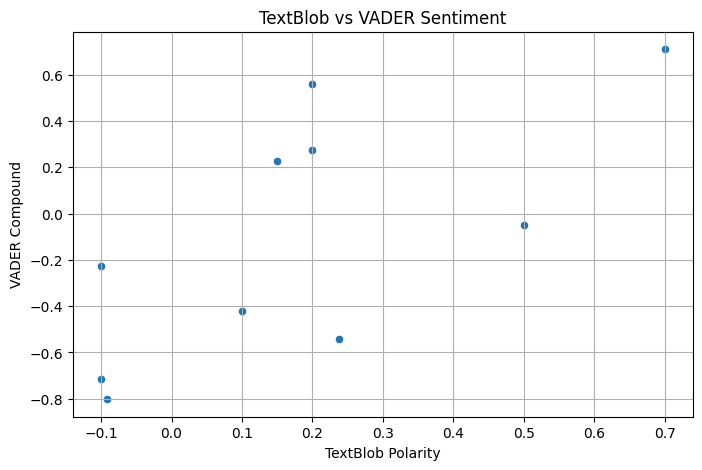

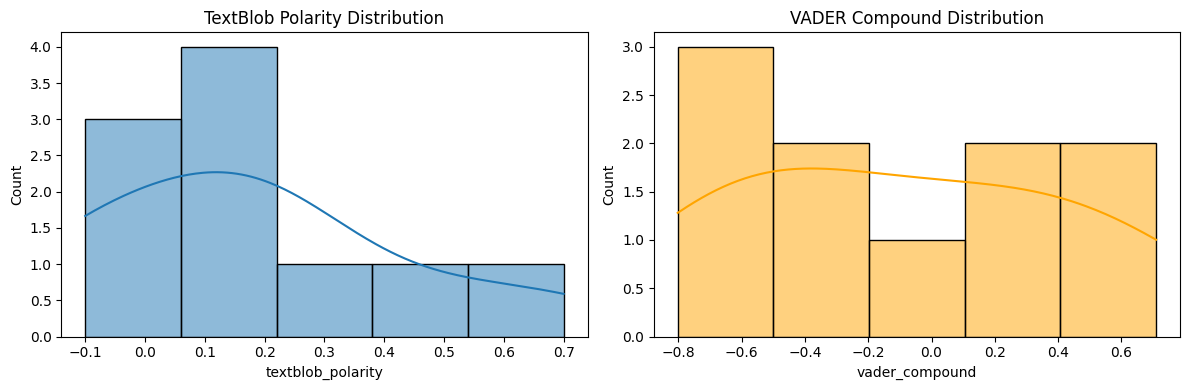

In [52]:
# Practical 4 Sentiment Analysis

# Install if missing:
# pip install textblob vaderSentiment nltk

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources once
for res in ['stopwords', 'wordnet', 'omw-1.4', 'punkt']:
    nltk.download(res)

# Step 1: Sample legal texts
texts = [
    "The court's decision was a clear victory for the plaintiffs, who had suffered significant injustice.",
    "The dissenting opinion strongly criticized the majority's flawed logic and its potential negative impact.",
    "After careful consideration of all arguments, the court found no basis for the defendant's appeal.",
    "The appellant presented compelling evidence; however, it was ultimately deemed insufficient.",
    "The settlement agreement reached by the parties represents a fair and equitable resolution to this protracted dispute.",
    "The judge's remarks were surprisingly lenient given the severity of the crime.",
    "The legal team argued persuasively, leading to a favorable outcome for their client.",
    "Despite the initial optimism, the case took an unexpected turn for the worse.",
    "The ruling was met with widespread approval from legal scholars.",
    "There was considerable doubt surrounding the validity of the evidence presented."
]

# Put into DataFrame
df = pd.DataFrame({'text': texts})

# Step 2: Preprocess
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r"[^\w\s-]", "", text.lower())
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

df['clean'] = df['text'].apply(preprocess)

# Step 3: Sentiment analysis
vader = SentimentIntensityAnalyzer()

df['textblob_polarity'] = df['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['vader_compound'] = df['clean'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Display results
print(df[['text', 'textblob_polarity', 'vader_compound']])

# Correlation
corr = df['textblob_polarity'].corr(df['vader_compound'])
print(f"\nCorrelation between TextBlob and VADER: {corr:.3f}")

# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='textblob_polarity', y='vader_compound')
plt.title("TextBlob vs VADER Sentiment")
plt.xlabel("TextBlob Polarity")
plt.ylabel("VADER Compound")
plt.grid(True)
plt.show()

# Histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['textblob_polarity'], kde=True)
plt.title("TextBlob Polarity Distribution")
plt.subplot(1, 2, 2)
sns.histplot(df['vader_compound'], kde=True, color='orange')
plt.title("VADER Compound Distribution")
plt.tight_layout()
plt.show()

✅ How to Interpret:
1. Polarity Scores
Positive: legal opinions that praise, support or validate decisions

Negative: criticism, failure, or opposition in opinions

2. Subjectivity
High = based on personal feelings or judgment

Low = objective, neutral legal reasoning

3. VADER vs TextBlob
TextBlob uses a simple lexicon.

VADER is optimized for social and nuanced text (often better for subtle tone).

✅ Correlation Interpretation:
If correlation ≈ 1 → TextBlob and VADER agree closely.

If correlation ≈ 0 → their judgments differ.

In legal texts, correlation might be moderate (~0.3–0.6) due to formality vs emotion difference.

✅ Visualization Insights:
Scatter Plot: See if higher polarity also means higher VADER score (i.e., upward trend)

Histograms: See overall sentiment distribution

Are most opinions neutral, or leaning positive/negative?


Logistic Regression
Accuracy: 0.38
              precision    recall  f1-score   support

        Lost       0.42      0.52      0.46        67
     Settled       0.35      0.17      0.23        64
         Won       0.35      0.43      0.39        69

    accuracy                           0.38       200
   macro avg       0.37      0.38      0.36       200
weighted avg       0.37      0.38      0.36       200



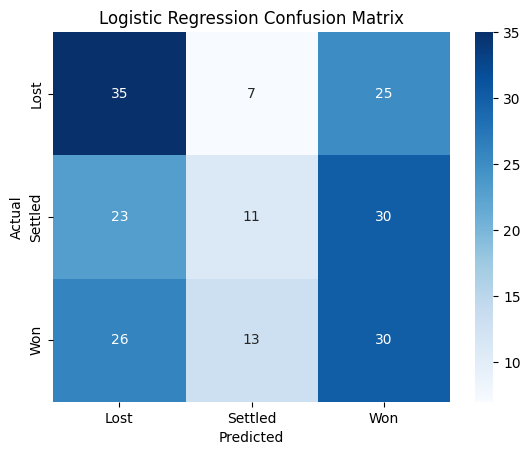


Decision Tree
Accuracy: 0.36
              precision    recall  f1-score   support

        Lost       0.30      0.37      0.33        67
     Settled       0.44      0.41      0.42        64
         Won       0.38      0.32      0.35        69

    accuracy                           0.36       200
   macro avg       0.37      0.37      0.37       200
weighted avg       0.37      0.36      0.37       200



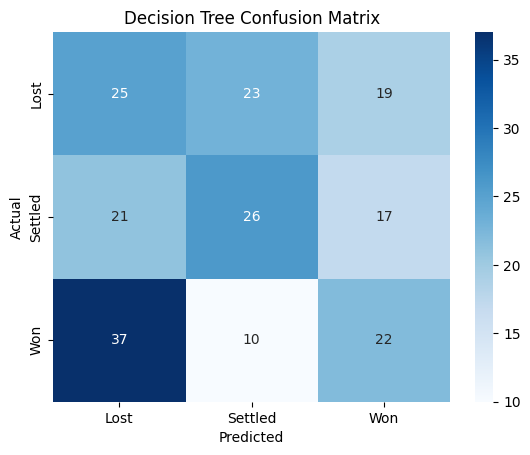

In [55]:
# Practical 5:  machine learning model 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------
# 1. Create Data
# -----------------------------------
data = pd.DataFrame({
    'Jurisdiction': np.random.choice(['Federal', 'State', 'Local'], 1000),
    'Case_Type': np.random.choice(['Civil', 'Criminal', 'Traffic'], 1000),
    'Plaintiff_Type': np.random.choice(['Individual', 'Company', 'Government'], 1000),
    'Defendant_Type': np.random.choice(['Company', 'Individual'], 1000),
    'Judge': np.random.choice(['A', 'B', 'C'], 1000),
    'Outcome': np.random.choice(['Won', 'Lost', 'Settled'], 1000)
})

# -----------------------------------
# 2. Encode Data
# -----------------------------------
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# One-hot encode features
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = ohe.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(X.columns))

# Label encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# -----------------------------------
# 3. Split
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# -----------------------------------
# 4. Train & Evaluate
# -----------------------------------
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


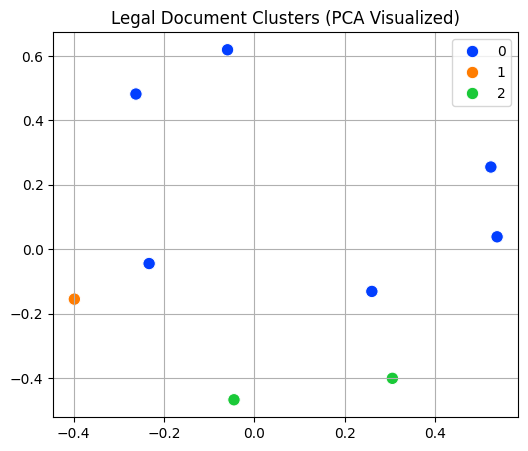

                                             Document  Cluster
0   The landlord must provide a safe and habitable...        2
1   The employee is entitled to severance pay upon...        0
2   This agreement includes a confidentiality clau...        0
3   The contractor shall complete the work by the ...        1
4   In case of breach, the aggrieved party may see...        0
5   The merger agreement must be approved by the s...        2
6   The plaintiff alleges that the defendant breac...        0
7   This lease agreement is valid for a term of on...        0
8   The arbitration process shall be conducted in ...        1
9   The parties acknowledge that they have read an...        0
10  The insurance policy covers damages resulting ...        0


In [56]:
# Practical 6 clustering algorithms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (runs only if missing)
for resource in ['stopwords', 'wordnet']:
    nltk.download(resource, quiet=True)

# -------------------------------------
# 1. Data
# -------------------------------------
documents = [
    "The landlord must provide a safe and habitable living environment.",
    "The employee is entitled to severance pay upon termination.",
    "This agreement includes a confidentiality clause to protect sensitive information.",
    "The contractor shall complete the work by the specified deadline.",
    "In case of breach, the aggrieved party may seek damages.",
    "The merger agreement must be approved by the shareholders.",
    "The plaintiff alleges that the defendant breached the contract.",
    "This lease agreement is valid for a term of one year.",
    "The arbitration process shall be conducted in accordance with the rules of the American Arbitration Association.",
    "The parties acknowledge that they have read and understood the terms of this agreement.",
    "The insurance policy covers damages resulting from natural disasters."
]

# -------------------------------------
# 2. Preprocessing Function
# -------------------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

# Preprocess all docs
clean_docs = [preprocess(d) for d in documents]

# -------------------------------------
# 3. TF-IDF Vectorization
# -------------------------------------
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(clean_docs)

# -------------------------------------
# 4. KMeans Clustering
# -------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# -------------------------------------
# 5. PCA for Visualization
# -------------------------------------
X_pca = PCA(n_components=2).fit_transform(X.toarray())

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="bright", s=80)
plt.title("Legal Document Clusters (PCA Visualized)")
plt.grid(True)
plt.show()

# -------------------------------------
# 6. Show Clusters
# -------------------------------------
cluster_df = pd.DataFrame({'Document': documents, 'Cluster': labels})
print(cluster_df)



🔹 Topic 1: shall, resolved, london, dispute, arising

🔹 Topic 2: must, data, requirement, protection, party

🔹 Topic 3: york, subject, new, court, contract

Document-Topic Distribution:
    Topic 1   Topic 2   Topic 3  \
0  0.049684  0.049027  0.901290   
1  0.048063  0.047937  0.904000   
2  0.042064  0.914085  0.043851   
3  0.902686  0.048639  0.048676   
4  0.048078  0.903964  0.047958   
5  0.048061  0.050363  0.901575   
6  0.865984  0.067003  0.067014   
7  0.049764  0.901105  0.049131   

                                            Document  
0  The agreement shall be governed by the laws of...  
1  This contract is subject to the jurisdiction o...  
2  Parties must comply with the GDPR requirements...  
3  Any dispute arising shall be resolved through ...  
4  The lessee agrees to maintain the property in ...  
5  Data must be encrypted in accordance with HIPA...  
6  The defendant has the right to legal represent...  
7  This NDA shall remain in effect for a period o...  


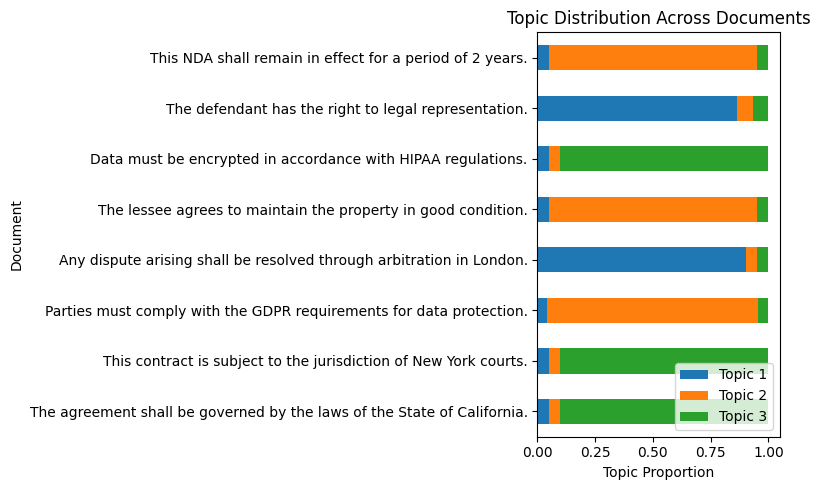

In [57]:
# Practical 7: Topic Modelling - LDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources if missing
for res in ['stopwords', 'wordnet']:
    nltk.download(res, quiet=True)

# ----------------------------------------
# 1. Data
# ----------------------------------------
documents = [
    "The agreement shall be governed by the laws of the State of California.",
    "This contract is subject to the jurisdiction of New York courts.",
    "Parties must comply with the GDPR requirements for data protection.",
    "Any dispute arising shall be resolved through arbitration in London.",
    "The lessee agrees to maintain the property in good condition.",
    "Data must be encrypted in accordance with HIPAA regulations.",
    "The defendant has the right to legal representation.",
    "This NDA shall remain in effect for a period of 2 years."
]

# ----------------------------------------
# 2. Preprocess Text
# ----------------------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

clean_docs = [preprocess(doc) for doc in documents]

# ----------------------------------------
# 3. LDA Topic Modeling
# ----------------------------------------
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(clean_docs)

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Print topics
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-5:][::-1]]
    print(f"\n🔹 Topic {idx+1}: {', '.join(top_words)}")

# ----------------------------------------
# 4. Document-Topic Distribution
# ----------------------------------------
topic_dist = lda.transform(X)
df_topics = pd.DataFrame(topic_dist, columns=[f'Topic {i+1}' for i in range(3)])
df_topics['Document'] = documents

print("\nDocument-Topic Distribution:")
print(df_topics)

# ----------------------------------------
# 5. Plot
# ----------------------------------------
df_topics.set_index('Document').plot(kind='barh', stacked=True, figsize=(8,5))
plt.title('Topic Distribution Across Documents')
plt.xlabel('Topic Proportion')
plt.tight_layout()
plt.show()



Named Entities:
15th March 2023 (DATE)
the Supreme Court of India (ORG)
State (ORG)
Maharashtra vs (ORG)
ABC Corporation (ORG)
D.Y. Chandrachud (PERSON)
Sanjay Kishan Kaul (PERSON)
Maharashtra (ORG)
ABC Corporation (ORG)
Mumbai (GPE)

Entity Counts:
DATE: 1
ORG: 6
PERSON: 2
GPE: 1


C:\Users\Purav Badani\AppData\Local\Temp\ipykernel_32688\3577323954.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="Set2")


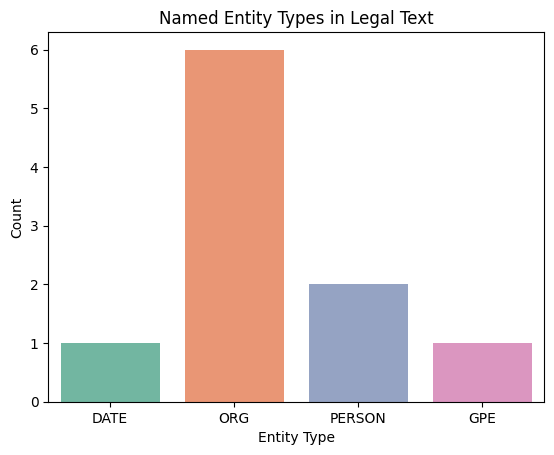

In [60]:
# Practical 8: NER

import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Sample legal text
text = """
On 15th March 2023, the Supreme Court of India delivered a judgment in
the case of State of Maharashtra vs ABC Corporation.
The case was presided over by Chief Justice D.Y. Chandrachud and
Justice Sanjay Kishan Kaul.
The matter pertained to a violation of contract between the Government
of Maharashtra and ABC Corporation, a private logistics company based
in Mumbai.
"""

# Process text and extract entities
doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print entities
print("\nNamed Entities:")
for ent, label in entities:
    print(f"{ent} ({label})")

# Count entity types
counts = Counter(label for _, label in entities)
print("\nEntity Counts:")
for label, count in counts.items():
    print(f"{label}: {count}")

# Plot frequencies
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="Set2")
plt.title("Named Entity Types in Legal Text")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()


In [61]:
# Practical 9 QA System BERT

# ---------------------------
# CONDA SETUP (shell commands)
# ---------------------------
# conda create -n legal-qa-env python=3.10
# conda activate legal-qa-env
# pip install transformers datasets torch evaluate

# ---------------------------
# Python Script (legal_qa.py)
# ---------------------------

import torch
from transformers import BertTokenizerFast, BertForQuestionAnswering, Trainer, TrainingArguments
from datasets import Dataset
import evaluate

# -------------------------------------
# 1. Sample Data
# -------------------------------------
train_data = {
    "context": [
        "This agreement may be terminated by either party with a 30-day written notice.",
        "Parties agree to keep all information confidential for two years after contract termination."
    ],
    "question": [
        "What is the termination clause?",
        "What is the confidentiality duration?"
    ],
    "answers": [
        {"text": ["terminated by either party with a 30-day written notice"], "answer_start": [38]},
        {"text": ["two years after contract termination"], "answer_start": [57]}
    ]
}

valid_data = {
    "context": ["The employee may be dismissed for misconduct or violation of policy."],
    "question": ["What are reasons for dismissal?"],
    "answers": [{"text": ["misconduct or violation of policy"], "answer_start": [33]}]
}

train_ds = Dataset.from_dict(train_data)
valid_ds = Dataset.from_dict(valid_data)

# -------------------------------------
# 2. Model & Tokenizer
# -------------------------------------
model_name = "bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(model_name)
model = BertForQuestionAnswering.from_pretrained(model_name)

# -------------------------------------
# 3. Preprocessing Function
# -------------------------------------
def preprocess(batch):
    tokenized = tokenizer(
        batch["question"],
        batch["context"],
        truncation=True,
        max_length=384,
        stride=128,
        return_offsets_mapping=True,
        padding="max_length"
    )
    start_pos, end_pos = [], []
    for i, offsets in enumerate(tokenized["offset_mapping"]):
        ans = batch["answers"][i]
        start_char = ans["answer_start"][0]
        end_char = start_char + len(ans["text"][0])
        seq_ids = tokenized.sequence_ids(i)

        token_start, token_end = 0, len(offsets)-1
        while seq_ids[token_start] != 1: token_start += 1
        while seq_ids[token_end] != 1: token_end -= 1

        if start_char >= offsets[token_start][0] and end_char <= offsets[token_end][1]:
            for idx in range(token_start, token_end + 1):
                if offsets[idx][0] <= start_char < offsets[idx][1]:
                    start_pos.append(idx)
                    break
            for idx in reversed(range(token_start, token_end + 1)):
                if offsets[idx][0] < end_char <= offsets[idx][1]:
                    end_pos.append(idx)
                    break
        else:
            start_pos.append(tokenized["input_ids"][i].index(tokenizer.cls_token_id))
            end_pos.append(tokenized["input_ids"][i].index(tokenizer.cls_token_id))

    tokenized["start_positions"] = start_pos
    tokenized["end_positions"] = end_pos
    tokenized.pop("offset_mapping")
    return tokenized

train_ds = train_ds.map(preprocess, batched=True, remove_columns=train_ds.column_names)
valid_ds = valid_ds.map(preprocess, batched=True, remove_columns=valid_ds.column_names)

# -------------------------------------
# 4. Metrics
# -------------------------------------
metric = evaluate.load("squad")

def compute_metrics(p):
    start, end = p.predictions
    predictions = []
    for i in range(len(start)):
        start_idx = torch.argmax(torch.tensor(start[i])).item()
        end_idx = torch.argmax(torch.tensor(end[i])).item()
        if end_idx < start_idx:
            end_idx = start_idx
        input_ids = valid_ds[i]["input_ids"]
        pred_text = tokenizer.decode(input_ids[start_idx:end_idx+1], skip_special_tokens=True)
        predictions.append({"id": str(i), "prediction_text": pred_text})
    references = [{"id": str(i), "answers": valid_data["answers"][i]} for i in range(len(valid_data["answers"]))]
    return metric.compute(predictions=predictions, references=references)

# -------------------------------------
# 5. Training Setup
# -------------------------------------
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=valid_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# -------------------------------------
# 6. Train and Evaluate
# -------------------------------------
trainer.train()
results = trainer.evaluate()
print("Evaluation Results:", results)

# -------------------------------------
# 7. Simple Inference
# -------------------------------------
def answer(question, context):
    inputs = tokenizer(question, context, return_tensors="pt")
    outputs = model(**inputs)
    start = torch.argmax(outputs.start_logits)
    end = torch.argmax(outputs.end_logits)
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    answer_tokens = tokens[start:end+1]
    return tokenizer.convert_tokens_to_string(answer_tokens).strip()

q = "What is the termination clause?"
c = "This agreement may be terminated by either party with a 30-day written notice."
print(f"Q: {q}")
print(f"A: {answer(q, c)}")


#Step 5: Run script inside the virtual environment 
#python legal_qa.py 



ValueError: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.